**Transfer Learning**
- Tansfer Learning is a Deep Learning technique where we use a pre-trained model. This pre-trained model is trained for one task and can be re-trained for a simillar task with a smaller dataset.
- Tansfer Learning gives higher accuracy compared to training models from scratch.
- Examples of pre-trained models:
   + VGG-16
   + ResNet50
   + Inceptionv3
   + MobileNetV2

**Extracting dataset using Kaggle API**

In [3]:
# installing the kaggle library
#!pip install kaggle

In [7]:
# configuring the path of kaggle.json file
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [8]:
import os
import shutil

# Create the .kaggle directory if it doesn't exist
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Copy the kaggle.json file to the .kaggle directory
shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))

# Set file permissions (optional, works in Unix-like systems)
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

print("kaggle.json file configured successfully!")

kaggle.json file configured successfully!


**Importing the Dog vs Cat Dataset from kaggle**

In [16]:
# kaggle api
# !kaggle competitions download -c dogs-vs-cats-mvml-2020


  0%|          | 0.00/545M [00:00<?, ?B/s]
  0%|          | 1.00M/545M [00:01<14:44, 645kB/s]
  0%|          | 2.00M/545M [00:01<07:17, 1.30MB/s]
  1%|          | 3.00M/545M [00:01<04:30, 2.10MB/s]
  1%|          | 4.00M/545M [00:02<03:12, 2.94MB/s]
  1%|          | 5.00M/545M [00:02<02:30, 3.77MB/s]
  1%|1         | 6.00M/545M [00:02<02:08, 4.40MB/s]
  1%|1         | 7.00M/545M [00:02<01:55, 4.87MB/s]
  1%|1         | 8.00M/545M [00:02<01:49, 5.15MB/s]
  2%|1         | 9.00M/545M [00:02<01:44, 5.38MB/s]
  2%|1         | 10.0M/545M [00:03<01:50, 5.08MB/s]
  2%|2         | 11.0M/545M [00:03<01:37, 5.76MB/s]
  2%|2         | 12.0M/545M [00:03<01:38, 5.66MB/s]
  2%|2         | 13.0M/545M [00:03<01:26, 6.44MB/s]
  3%|2         | 14.0M/545M [00:03<01:25, 6.49MB/s]
  3%|2         | 15.0M/545M [00:03<01:27, 6.35MB/s]
  3%|2         | 16.0M/545M [00:04<01:29, 6.22MB/s]
  3%|3         | 17.0M/545M [00:04<01:30, 6.14MB/s]
  3%|3         | 18.0M/545M [00:04<01:35, 5.81MB/s]
  3%|3         | 19.0

In [19]:
!dir

 Volume in drive H is DEVELOPMENT
 Volume Serial Number is 88E4-6B11

 Directory of H:\Data_science_srk\Siddhardhan\Deep Learning Project\3. Dog vs Cat Classification using Transfer Learning

12/24/2024  04:28 PM    <DIR>          .
12/24/2024  03:38 PM    <DIR>          ..
12/24/2024  03:40 PM    <DIR>          .ipynb_checkpoints
12/24/2024  04:28 PM           172,088 Dog vs Cat Classification using Transfer Learning.ipynb
05/05/2020  01:59 PM       571,630,934 dogs-vs-cats-mvml-2020.zip
12/24/2024  03:53 PM                72 kaggle.json
12/24/2024  03:46 PM                 0 Transfer Learning.docx
               4 File(s)    571,803,094 bytes
               3 Dir(s)  147,581,972,480 bytes free


In [23]:
# extracting the compressed dataset
# from zipfile import ZipFile

# dataset = 'dogs-vs-cats-mvml-2020.zip'

# with ZipFile(dataset,'r') as zip:
#     zip.extractall()
# print('The dataset is extracted')

The dataset is extracted


**Printing the name of images**

In [24]:
import os

file_names = os.listdir('cats_vs_dogs')
print(file_names)

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10005.jpg', 'cat.10008.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10029.jpg', 'cat.10030.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10047.jpg', 'cat.10048.jpg', 'cat.10049.jpg', 'cat.10050.jpg', 'cat.10051.jpg', 'cat.10052.jpg', 'cat.10053.jpg', 'cat.10054.jpg', 'cat.10057.jpg', 'cat.10058.jpg', 'cat.10059.jpg', 'cat.1006.jpg', 'cat.10060.jpg', 'cat.10062.jpg', 'cat.10063.jpg', 'cat.10064.jpg', 'cat.10065.jpg', 'cat.10066.jpg', 'cat.10067.jp

**Importing the Dependencies**

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
import cv2

**Displaying the images of dogs and cats**

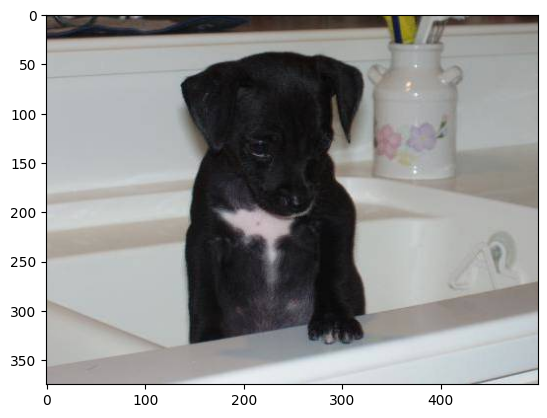

In [2]:
# display dog image
img = mpimg.imread('cats_vs_dogs/dog.8298.jpg')
imgplt = plt.imshow(img)

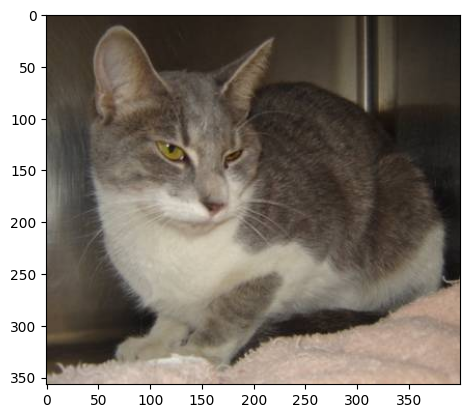

In [3]:
# display cat image
img = mpimg.imread('cats_vs_dogs/cat.4352.jpg')
imgplt = plt.imshow(img)

**Resizing all the images**

In [29]:
# creating a directory for resized image
# os.mkdir('/image resized')

In [5]:
import os
original_folder = 'image_resized/'
resized_folder = 'image resized/'

for i in range(2000):
    filename = os.listdir(original_folder)[i]
    img_path = original_folder+filename
    
    img = Image.open(img_path)
    img = img.resize((224,224))
    img = img.convert('RGB')
    
    newImgPath = resized_folder+filename
    img.save(newImgPath)

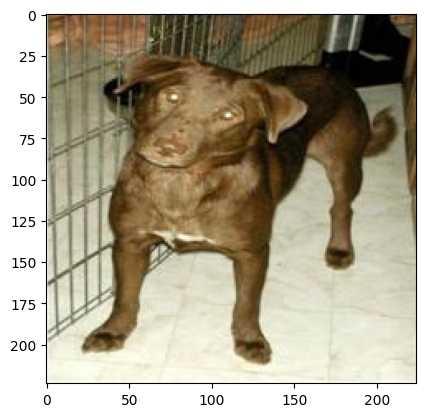

In [7]:
# display resized dog image
img = mpimg.imread('image resized/dog.1.jpg')
imgplt = plt.imshow(img)

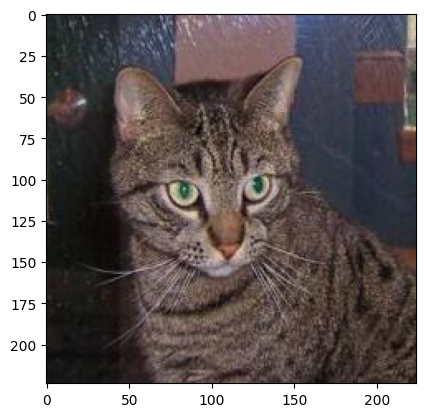

In [8]:
# display resized cat image
img = mpimg.imread('image resized/cat.1.jpg')
imgplt = plt.imshow(img)

**Creating labels for resized images of dogs and cats**

cat--> 0

dog--> 1

In [3]:
# creating a for loop to assign labels
import os
filenames = os.listdir('image resized')

labels = []

for i in range(2000):
    
    file_name = filenames[i]
    label = file_name[0:3]
    
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)

In [4]:
print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
2000


In [5]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
2000


In [6]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1000 1000]


**Converting all the resized images to numpy array**

In [7]:
import cv2
import glob

In [19]:
# image_directory = '/image resized/'
# image_extension = ['png','jpg']

# files = []
# files.extend(glob.glob(image_directory + '*.' + e) for e in image_extension)

# dog_cat_images = np.asarray([cv2.imread(file) for file in files])